# Text preprocessing function

In [3]:
import re
from bs4 import BeautifulSoup
import unicodedata
import contractions
import pandas as pd
import nltk
import numpy as np


# import the inflect library
import inflect
p = inflect.engine()

In [4]:
# For lemamtization
#import spacy

In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('europarl_raw')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naemi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naemi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package europarl_raw to
[nltk_data]     C:\Users\naemi\AppData\Roaming\nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\naemi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
# Import Data
df_raw = pd.read_csv('../../data/interim/df_locs_full.csv')
df_raw

,Unnamed: 0,Username,ID,Date Created,Nr of Likes,Nr of Followers,Language,Location,nr of posts,Description,Likes_count,location_lat,location_long
0,1,KhashanDalia,1383801795823116291,2021-04-18 15:17:23+00:00,19991,1809,NaN,"Toronto, Ontario",5717,Passionate #MUFC Fan | Views are my own 🔴⚪⚫ #G...,19991,43.653482,-79.383935
1,4,colbeck_daniel,1132972165572308993,2019-05-27 11:29:48+00:00,10075,1886,NaN,"England, United Kingdom",5882,Live in Yorkshire. Lover of comics and books. ...,10075,52.531021,-1.264906
2,5,Muphyk,501818126,2012-02-24 14:19:32+00:00,28123,489,NaN,LAGOS,71584,Iron merchant services \nVbank : 1004686329 \n...,28123,6.455057,3.394179
3,8,trueREDdeviI,1556141606171947008,2022-08-07 04:54:26+00:00,748,423,NaN,Theater of dreams,414,Red Devil since 1983 🇾🇪 #F4F,748,38.976963,-76.486973
4,9,JasdeepSChhabra,1717151600,2013-08-31 23:57:15+00:00,6051,301,NaN,Australia,3033,"Born in India, grew up in Singapore and living...",6051,-24.776109,134.755000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90019,137748,Guess__Who,18211275,2008-12-18 07:45:58+00:00,1772,271,NaN,Mumbai,6305,You can count me in if it's got something to d...,1772,19.078545,72.878176
90020,137749,stustech,3302609518,2015-05-29 09:44:06+00:00,996,1106,NaN,"Scotland, United Kingdom",2564,For Business Enquiries contact stu.techtime@gm...,996,56.786111,-4.114052
90021,137751,JustinBock788,349516738,2011-08-06 06:41:49+00:00,1845,511,NaN,"Cape Town - /\/¯¯¯¯\/\, ZA",6788,Dream♦ | Adapt★ | Transform▲☀▼ *Defeat All Odds*,1845,-33.928992,18.417396
90022,137752,lastiemar,51477843,2009-06-27 16:13:08+00:00,7218,198,NaN,Clonmel,14239,Former Club athlete cut short by a hip replace...,7218,53.391658,-6.273465


In [ ]:
# Drop all empty cells
df_raw= df_raw.dropna(subset = ['Description'])

## Individual cleaning function

In [17]:

nlp = spacy.load('en_core_web_sm')
ps = nltk.porter.PorterStemmer()

# HTML removal
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

# accent removal
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# contraction expansion
def expand_contractions(text):
    return contractions.fix(text)

# lemamtization
def spacy_lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

# stemming
def simple_stemming(text, stemmer=ps):
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# special character removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

# stopword removal
# Add or remove stopwords manually
def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
        remove_words = ['not', 'no','nor']
        for word in remove_words:
            if word in stopwords:
                stopwords.remove(word)
        #stopwords.extend(['mufc','manunited','manchesterunited','pl','united'])
        stopwords.sort()
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]

    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]

    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Use https://www.autoregex.xyz/home for create regex
# Use https://pythex.org/ for testing out the pattern
def remove_hashtag_space(text):
    pattern = r'http|http\S+'
    text = re.sub(pattern, '', text)
    text = re.sub(' +', ' ', text)
    return text

In [18]:
%%time

## Use this sample line for testing the preprocessor function
#df_raw_100000 = df_raw.sample(100000)

# Comment the function which you don't want to use
def text_pre_processor(text,deep_learning = False):
    text = strip_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_hashtag_space(text)
    text = remove_special_characters(text)
    text = expand_contractions(text)
    #text = spacy_lemmatize_text(text)
    #text = simple_stemming(text)
    if deep_learning == False:
        text = remove_stopwords(text)
    #text = convert_number(text)
    return text

## deep_learning = False --> removes stopwords
## deep_learning = False --> don't removes stopwords
df_raw['Description_clean'] = df_raw['Description'].apply(lambda row: text_pre_processor(row, deep_learning=False))

df_raw

C:\Users\naemi\anaconda3\envs\SitAuto\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\naemi\anaconda3\envs\SitAuto\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


CPU times: total: 29.3 s
Wall time: 35.4 s


<timed exec>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,Username,ID,Date Created,Nr of Likes,Nr of Followers,Language,Location,nr of posts,Description,Likes_count,location_lat,location_long,Description_clean
0,1,KhashanDalia,1383801795823116291,2021-04-18 15:17:23+00:00,19991,1809,NaN,"Toronto, Ontario",5717,Passionate #MUFC Fan | Views are my own 🔴⚪⚫ #G...,19991,43.653482,-79.383935,Passionate MUFC Fan Views GGMU GlazersOut Manutd
1,4,colbeck_daniel,1132972165572308993,2019-05-27 11:29:48+00:00,10075,1886,NaN,"England, United Kingdom",5882,Live in Yorkshire. Lover of comics and books. ...,10075,52.531021,-1.264906,Live Yorkshire Lover comics books football coa...
2,5,Muphyk,501818126,2012-02-24 14:19:32+00:00,28123,489,NaN,LAGOS,71584,Iron merchant services \nVbank : 1004686329 \n...,28123,6.455057,3.394179,Iron merchant services Vbank MUFC
3,8,trueREDdeviI,1556141606171947008,2022-08-07 04:54:26+00:00,748,423,NaN,Theater of dreams,414,Red Devil since 1983 🇾🇪 #F4F,748,38.976963,-76.486973,Red Devil since FF
4,9,JasdeepSChhabra,1717151600,2013-08-31 23:57:15+00:00,6051,301,NaN,Australia,3033,"Born in India, grew up in Singapore and living...",6051,-24.776109,134.755000,Born India grew Singapore living Australia Man...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90019,137748,Guess__Who,18211275,2008-12-18 07:45:58+00:00,1772,271,NaN,Mumbai,6305,You can count me in if it's got something to d...,1772,19.078545,72.878176,count got something beer
90020,137749,stustech,3302609518,2015-05-29 09:44:06+00:00,996,1106,NaN,"Scotland, United Kingdom",2564,For Business Enquiries contact stu.techtime@gm...,996,56.786111,-4.114052,Business Enquiries contact stutechtimegmailcom...
90021,137751,JustinBock788,349516738,2011-08-06 06:41:49+00:00,1845,511,NaN,"Cape Town - /\/¯¯¯¯\/\, ZA",6788,Dream♦ | Adapt★ | Transform▲☀▼ *Defeat All Odds*,1845,-33.928992,18.417396,Dream Adapt Transform Defeat Odds
90022,137752,lastiemar,51477843,2009-06-27 16:13:08+00:00,7218,198,NaN,Clonmel,14239,Former Club athlete cut short by a hip replace...,7218,53.391658,-6.273465,Former Club athlete cut short hip replacement ...


In [ ]:
# Check if there is no float inside the text
def check_substrings (text):
    if str(text).isdigit():
        return 'bad'

df_raw['floatcheck'] = df_raw['Tweet_clean'].apply(check_substrings)

In [ ]:
# Drop all NA after cleaning
df_raw['Tweet_clean'].replace('', np.nan, inplace=True)
df_raw['Tweet_clean'].dropna(inplace=True)

In [74]:
# Filter out all digits
df_raw = df_raw[df_raw['floatcheck']!= 'bad']

In [73]:
df_raw.shape

(1075174, 31)

In [76]:
# Drop column with all strings which contains a float
df_raw.drop(['floatcheck'],axis=1)

,User,Date_Created,Number of Likes,Tweet,Retweets,Language,Mentioned Users,Source of Tweet,Haschtag,Month,...,match_time,match_score,match_#lLocation,match_attendance,Match,match_time_orig,match_location_orig,match_adj_start_time,match_adj_end_time,Tweet_clean
0,mufcMPB,2022-10-21 23:58:23+00:00,6726,Erik ten Hag wants Cristiano Ronaldo to say so...,370,en,"[User(username='FabrizioRomano', id=330262748,...",Twitter for iPhone,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,erik ten hag want cristiano ronaldo say sorri ...
1,KhashanDalia,2022-10-21 23:56:31+00:00,8,Fair enough tbh. Those players look up to him ...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fair enough honest player look moon play celeb...
2,RedReveal,2022-10-21 23:54:21+00:00,6,Happy Birthday Jade Moore! #mufc https://t.co/...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happi birthday jade moore
3,manutdnewsonly,2022-10-21 23:47:00+00:00,3,Starting XI: Chelsea vs Manchester United #MUF...,0,en,NaN,SocialBee.io v2,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start xi chelsea vs manchest unit mufcfamili r...
4,colbeck_daniel,2022-10-21 23:42:07+00:00,1,Erik Ten Hag is definitely the best signing of...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,erik ten hag definit best sign summer mould un...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075169,magfarm,2022-05-01 07:04:44+00:00,0,@UtdXclusive Never in a thousand years🙈🤯💀#ManU...,0,en,"[User(username='UtdXclusive', id=1193109572015...",Twitter for iPhone,manunited,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,utdxclus never thousand yearsmanunit
1075170,onthatilemodis5,2022-05-01 06:50:36+00:00,0,@AdvoBarryRoux #Chiefs\n#ManUnited\n#RealMadri...,0,en,"[User(username='AdvoBarryRoux', id=2449502355,...",Twitter for Android,manunited,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,advobarryroux chief manunit realmadrid even li...
1075171,SteveBusbyPEC,2022-05-01 06:21:29+00:00,2,Hope there is a mass walk out in the 73rd minu...,0,en,NaN,Twitter for iPad,manunited,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hope mass walk 73rd minut tomorrow rr ha read ...
1075172,mufc_eagleton,2022-05-01 02:30:53+00:00,1,Going to bed an ANGRY #ManUnited supporter thi...,0,en,"[User(username='premierleague', id=343627165, ...",Twitter for iPhone,manunited,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,go bed angri manunit support thi 30th april pr...


In [19]:
# Save the df to a csv
# Define a path and a file name for saving the new clean DF
posts_file = '../../data/interim/' +'_User_Description_clean.csv'

df_raw.to_csv(posts_file, encoding='utf-8', index = False)

In [35]:
# Check if there is still any tweets which contains a 'http'
df_raw['Tweet_clean'].str.contains('http').any()

True

In [25]:
# Print all Stopwords as a list --> Check if you maybe need to remove any words out to the list
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
# Sort and remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
remove_words = ['not', 'no','nor']
for word in remove_words:
    if word in stopwords:
        stopwords.remove(word)
stopwords.sort()
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'sh

# First Deepdive into the clean dataset
Create a wordcloud which gives you an indication what kind of words are now inside the cleaned DF

In [52]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

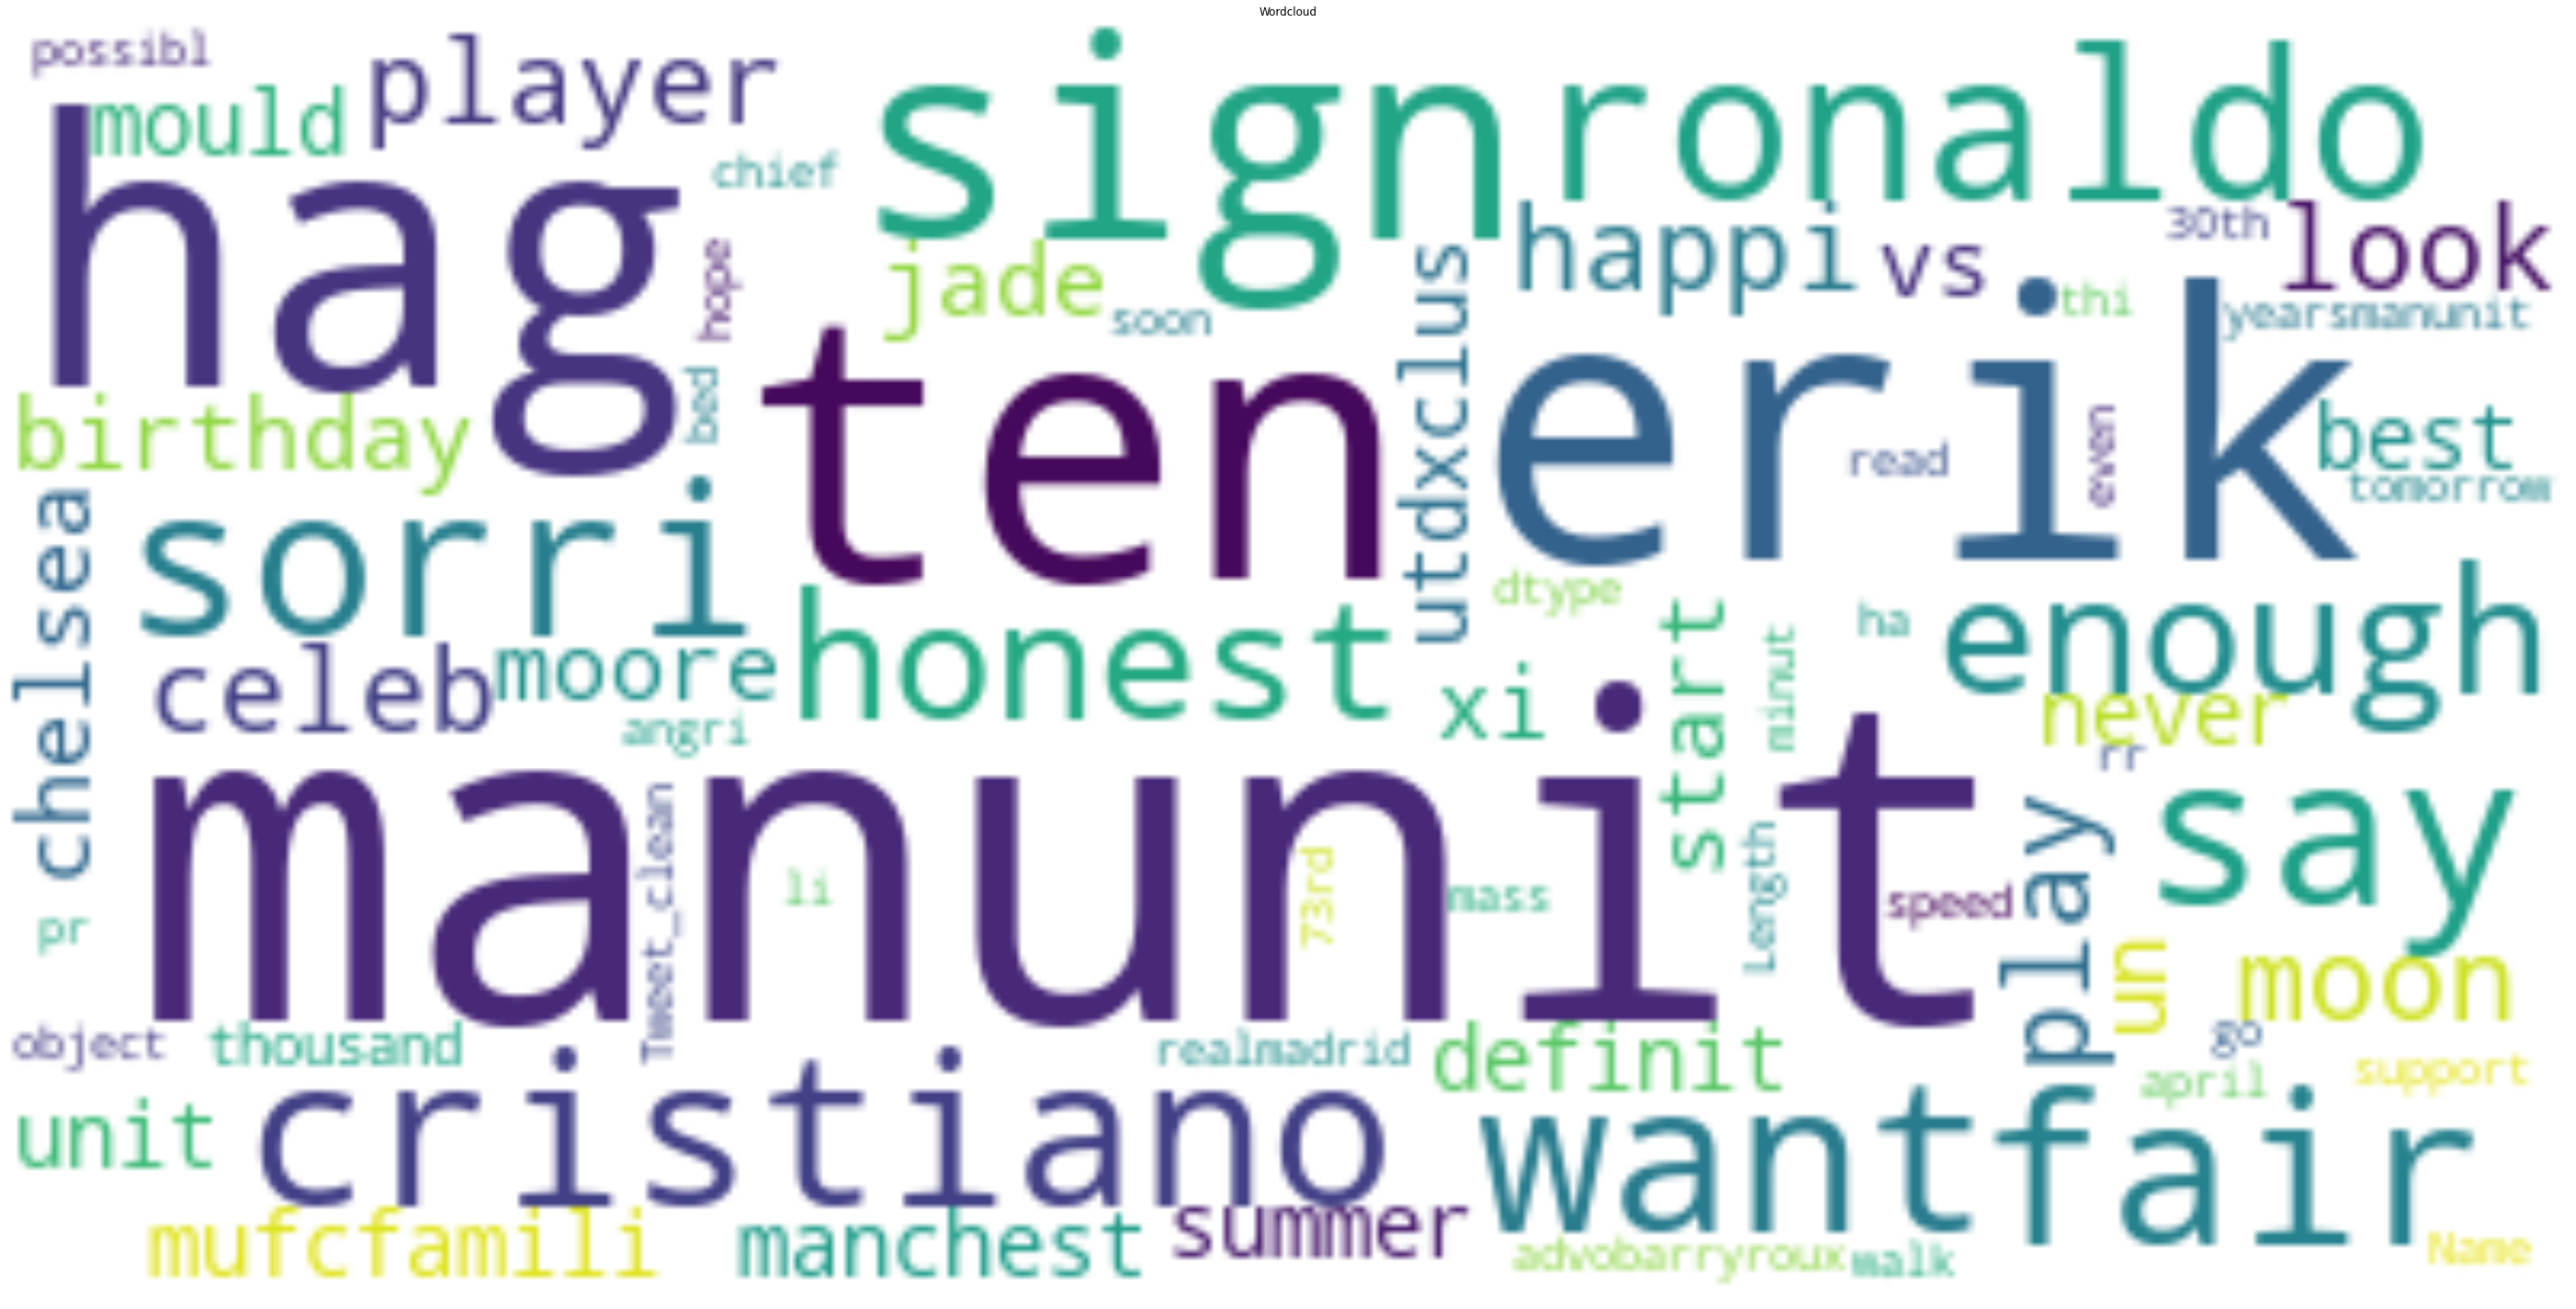

In [56]:
# Wordcloud for all tweets:
tweets = df_raw['Tweet_clean']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
wordcloud = WordCloud(max_font_size=70, max_words=70, background_color="white", stopwords = stop_words).generate(str(tweets))
plt.figure(figsize=(50,50))
plt.title("Wordcloud")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()